# CORDIS Data EDA

Reference data from [here](https://data.europa.eu/euodp/data/dataset/cordisref-data).

## Preamble

In [1]:
%run notebook_preamble.ipy

pd.set_option('max_columns', 99)

In [2]:
import seaborn as sns

from src.visualization.visualize import pdf_cdf

## Data Structure

### H2020

In [3]:
!ls '/Users/grichardson/nesta/eurito/funding_analytics_eu/data/external/cordis/h2020'

cordis-h2020-erc-pi.xlsx      cordis-h2020projects.csv
cordis-h2020-msca-fellows.xls cordis-h2020reports.csv
cordis-h2020organizations.csv


In [4]:
h2020_projects_df = pd.read_csv(
    os.path.join(cordis_h2020_path, 'cordis-h2020projects.csv'),
    sep=';',
    encoding='iso-8859-1',
    parse_dates=['startDate', 'endDate'],
    infer_datetime_format=True,
    decimal=','
)
h2020_orgs_df = pd.read_csv(
    os.path.join(cordis_h2020_path, 'cordis-h2020organizations.csv'),
    sep=';',
    encoding='iso-8859-1',
    decimal=',',
)
h2020_reports_df = pd.read_csv(
    os.path.join(cordis_h2020_path, 'cordis-h2020reports.csv'),
)
h2020_pi_df = pd.read_excel(
    os.path.join(cordis_h2020_path, 'cordis-h2020-erc-pi.xlsx'),
    sheet_name='PI'
)
h2020_fellows_r1_df = pd.read_excel(
    os.path.join(cordis_h2020_path, 'cordis-h2020-msca-fellows.xls'),
    sheet_name='Report 1',
    header=3
).set_index('Project Number')
h2020_fellows_r2_df = pd.read_excel(
    os.path.join(cordis_h2020_path, 'cordis-h2020-msca-fellows.xls'),
    sheet_name='Report 2'
).set_index('projectId')
h2020_fellows_df = h2020_fellows_r1_df.join(h2020_fellows_r2_df, how='outer').reset_index().rename(columns={'index': 'projectId'})

In [5]:
h2020_projects_df.head(1)

,rcn,id,acronym,status,programme,topics,frameworkProgramme,title,startDate,endDate,projectUrl,objective,totalCost,ecMaxContribution,call,fundingScheme,coordinator,coordinatorCountry,participants,participantCountries,subjects
0,218249,822106,WeldGalaxy,SIGNED,H2020-EU.2.1.3.;H2020-EU.2.1.5.1.,DT-NMBP-20-2018,H2020,Digital Dynamic Knowledge Platform for Welding...,2018-10-01,2022-03-31,NaN,"WeldGalaxy project will deliver, a B2B online ...",NaN,7500000.0,H2020-NMBP-PLUG-2018,IA-LS,TWI LIMITED,UK,LULEA TEKNISKA UNIVERSITET;ROMSOFT SRL;TECHNOV...,SE;RO;UK;NO;PL;FR;IL;ES,NaN


In [6]:
h2020_reports_df.head(1)

,rcn,language,title,teaser,summary,workPerformed,finalResults,lastUpdateDate,country,projectID,projectAcronym,programme,topics,relatedFile,url,article
0,242635,en,Periodic Reporting for period 1 - DIET-SEX-GEN...,"In this research programme, I sought to invest...","In this research programme, I sought to invest...","""The project started by performing a large exp...","Although the project funding has seized, the r...",2018-11-30 10:07:22,NaN,708362,DIET-SEX-GENOMICS,H2020-EU.1.3.2.,MSCA-IF-2015-EF,/docs/results/h2020/708/708362_PS/img-0884.jpg,http://www.florenciacamus.com,NaN


In [7]:
h2020_orgs_df.head(1)

,projectRcn,projectID,projectAcronym,role,id,name,shortName,activityType,endOfParticipation,ecContribution,country,street,city,postCode,organizationUrl,vatNumber,contactForm,contactType,contactTitle,contactFirstNames,contactLastNames,contactFunction,contactTelephoneNumber,contactFaxNumber
0,218249,822106,WeldGalaxy,participant,999876874.0,LULEA TEKNISKA UNIVERSITET,LTU,HES,False,494177.0,SE,UNIVERSITETSOMRADET PORSON,LULEA,971 87,www.ltu.se,SE202100284101,https://ec.europa.eu/research/participants/api...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
h2020_pi_df.head(1)

,projectId,projectAcronym,fundingScheme,title,firstName,lastName,organisationId
0,633152,GEOFLUIDS,ERC-STG,DR,Alberto,Enciso Carrasco,999991722


In [9]:
h2020_fellows_df.head(1)

,projectId,Project Acronym,Project TOA Lvl1 Code,Project TOA Lvl2 Code,Participant PIC,Participant Legal Name,Proj Res Title,Proj Res First Name,Proj Res Last Name,projectAcronym,fundingScheme,organisationId (for MSCA-IF)/ RD organisationId (for other MSCA),title,firstName,lastName
0,4520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### FP7

In [10]:
!ls '/Users/grichardson/nesta/eurito/funding_analytics_eu/data/external/cordis/fp7'

cordis-fp7organizations.csv cordis-fp7reports.csv
cordis-fp7projects.csv


In [11]:
fp7_projects_df = pd.read_csv(
    os.path.join(cordis_fp7_path, 'cordis-fp7projects.csv'),
    sep=';',
    encoding='iso-8859-1',
    parse_dates=['startDate', 'endDate'],
    infer_datetime_format=True,
    decimal=','
)
fp7_orgs_df = pd.read_csv(
    os.path.join(cordis_fp7_path, 'cordis-fp7organizations.csv'),
    sep=';',
    encoding='iso-8859-1',
    decimal=',',
)
fp7_reports_df = pd.read_csv(
    os.path.join(cordis_fp7_path, 'cordis-fp7reports.csv'),
).drop('Unnamed: 16', axis=1)

/Users/grichardson/miniconda3/envs/py3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
fp7_projects_df.head(1)

,rcn,id,acronym,status,programme,topics,frameworkProgramme,title,startDate,endDate,projectUrl,objective,totalCost,ecMaxContribution,call,fundingScheme,coordinator,coordinatorCountry,participants,participantCountries,subjects
0,109540,604766,AMBER-ULV,ONG,FP7-TRANSPORT,GC.SST.2013-3.,FP7-TRANSPORT,Automotive Mechatronic Baseline for Electric ...,2013-01-07,2016-06-30,NaN,Ultra Light Vehicles (ULV) intrinsically have ...,3553961.0,2562300.0,FP7-SST-2013-RTD-1,CP-FP,CE.S.I. CENTRO STUDI INDUSTRIALI SRL,IT,E.O.S. SPA;NEDERLANDSE ORGANISATIE VOOR TOEGEP...,IT;NL;DE;FR;UK;DK,TRA


In [13]:
fp7_orgs_df.head(1)

,projectRcn,projectID,projectAcronym,role,id,name,shortName,activityType,endOfParticipation,ecContribution,country,street,city,postCode,organizationUrl,vatNumber,contactForm,contactType,contactTitle,contactFirstNames,contactLastNames,contactFunction,contactTelephoneNumber,contactFaxNumber
0,109540.0,604766,AMBER-ULV,participant,952282563.0,E.O.S. SPA,EOS,PRC,False,407443.0,IT,Via Principe Amedeo 11,TORINO,10123,NaN,NaN,https://ec.europa.eu/research/participants/api...,relatedContact,Mr.,Pierluigi,Caccherano,NaN,+39 3335388014,+39 0697230745


### Combining Programme Datasets

In [14]:
cordis_projects_df = pd.concat([h2020_projects_df, fp7_projects_df])
cordis_reports_df = pd.concat([h2020_reports_df, fp7_reports_df])
cordis_orgs_df = pd.concat([h2020_orgs_df, fp7_orgs_df])

## Exploration

### Project Funding, Participants and Timing

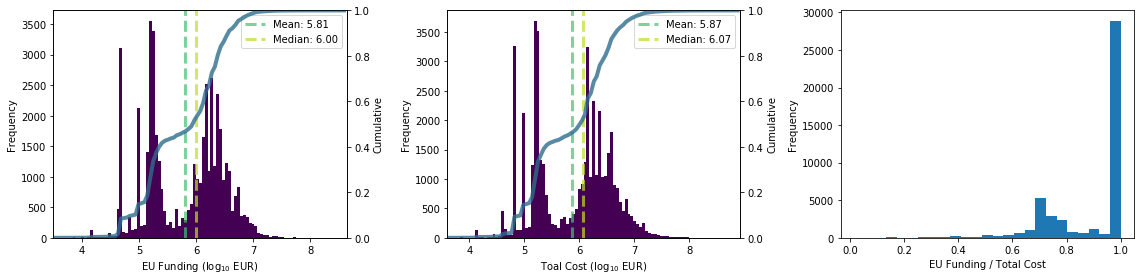

In [19]:
fig, ax = plt.subplots(ncols=3, figsize=(16, 4),)

pdf_cdf(
    ax[0], np.log10(cordis_projects_df['ecMaxContribution'][~pd.isnull(cordis_projects_df['ecMaxContribution'])]),
    bins=100
)
pdf_cdf(
    ax[1],
    np.log10(cordis_projects_df['totalCost'][~pd.isnull(cordis_projects_df['totalCost'])]),
    bins=100
)
x = cordis_projects_df['ecMaxContribution'] / cordis_projects_df['totalCost']
x = x[~np.isnan(x)]
ax[2].hist(
    x,
    bins=25
)
ax[0].set_xlabel('EU Funding (log$_{10}$ EUR)')
ax[1].set_xlabel('Toal Cost (log$_{10}$ EUR)')
ax[2].set_xlabel('EU Funding / Total Cost')
ax[2].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

In [20]:
def split_date(df, col):
    df[col + '_year'] = df[col].dt.year
    df[col + '_month'] = df[col].dt.month
    df[col + '_day'] = df[col].dt.day
    return df

In [21]:
cordis_projects_df = split_date(cordis_projects_df, 'startDate')
cordis_projects_df_start_year = cordis_projects_df.groupby('startDate_year').describe().reset_index()

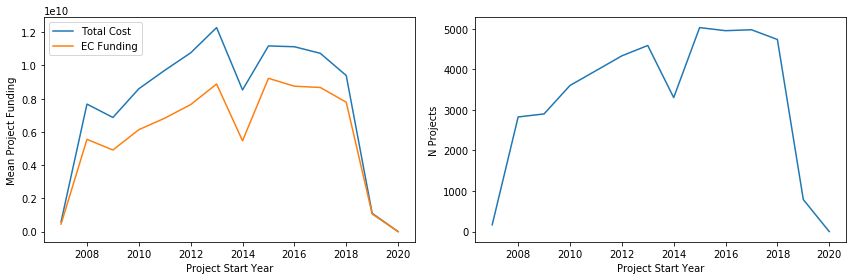

In [22]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 4), sharex=True)

ax[0].plot(
    cordis_projects_df_start_year['startDate_year'],
    cordis_projects_df_start_year['totalCost']['count'] * cordis_projects_df_start_year['totalCost']['mean'],
    label='Total Cost'
)
ax[0].plot(
    cordis_projects_df_start_year['startDate_year'],
    cordis_projects_df_start_year['ecMaxContribution']['count'] * cordis_projects_df_start_year['ecMaxContribution']['mean'],
    label='EC Funding'
)
ax[1].plot(
    cordis_projects_df_start_year['startDate_year'],
    cordis_projects_df_start_year['id']['count']
)
ax[0].set_ylabel('Mean Project Funding')
ax[0].set_xlabel('Project Start Year')
ax[1].set_ylabel('N Projects')
ax[1].set_xlabel('Project Start Year')

handles, labels = ax[0].get_legend_handles_labels()
ax[0].legend(handles, labels)

plt.tight_layout()
plt.show()

/Users/grichardson/miniconda3/envs/graph-tool/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


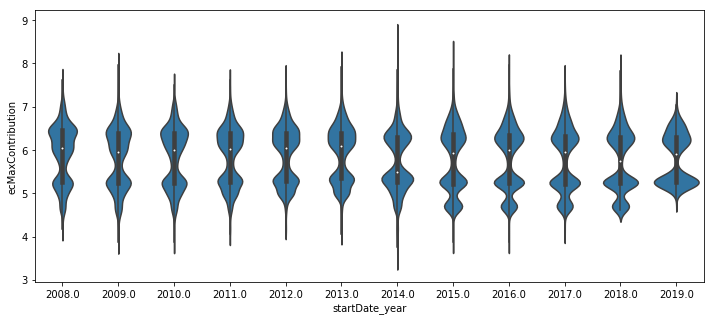

In [25]:
fig, ax = plt.subplots(figsize=(12, 5))
ax = sns.violinplot(
    cordis_projects_df['startDate_year'],
    np.log10(cordis_projects_df['ecMaxContribution']),
    color='C0'
)
ax.set_xlim((0.5, 12.5))
plt.show()

In [26]:
def number_of_entities(s):
    ents =  s.str.split(';')
    counts = []
    for e in ents:
        if type(e) == list:
            counts.append(len(e))
        else:
            counts.append(np.nan)
    return counts

In [27]:
cordis_projects_df['participantCountries_count'] = number_of_entities(cordis_projects_df['participantCountries'])

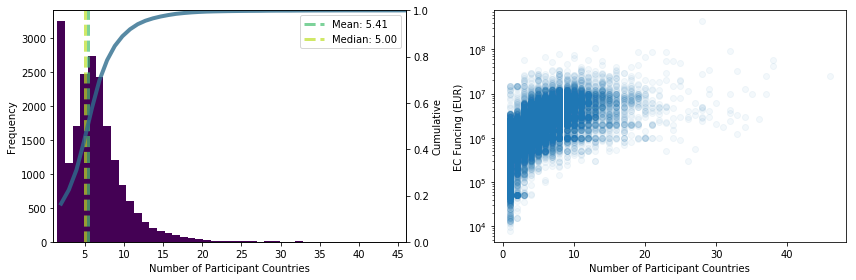

In [32]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 4))

pdf_cdf(ax[0],
    cordis_projects_df['participantCountries_count'],
    bins=int(cordis_projects_df['participantCountries_count'].max())
)
ax[1].scatter(
    cordis_projects_df['participantCountries_count'],
    cordis_projects_df['ecMaxContribution'],
    alpha=0.05,
)
ax[1].set_yscale('log')
ax[0].set_xlabel('Number of Participant Countries')
ax[0].set_ylabel('Frequency')
ax[1].set_xlabel('Number of Participant Countries')
ax[1].set_ylabel('EC Funcing (EUR)')
plt.tight_layout()
plt.show()

In [33]:
duration = cordis_projects_df['endDate'] - cordis_projects_df['startDate'] 

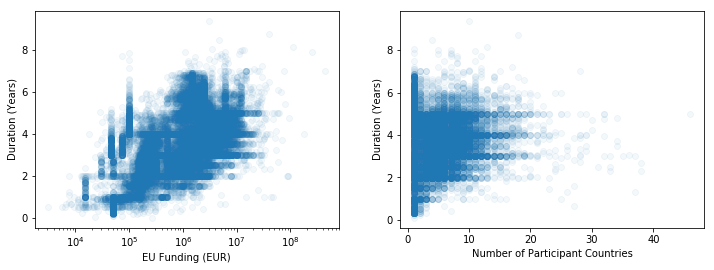

In [34]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 4))
ax[0].scatter(
    cordis_projects_df['ecMaxContribution'],
    duration.dt.total_seconds() / (365.25 * 24 * 3600),
    alpha=.05
)
ax[0].set_xscale('log')

ax[1].scatter(
    cordis_projects_df['participantCountries_count'],
    duration.dt.total_seconds() / (365.25 * 24 * 3600),
    alpha=.05
)
ax[0].set_xlabel('EU Funding (EUR)')
ax[0].set_ylabel('Duration (Years)')
ax[1].set_xlabel('Number of Participant Countries')
ax[1].set_ylabel('Duration (Years)')
plt.show()

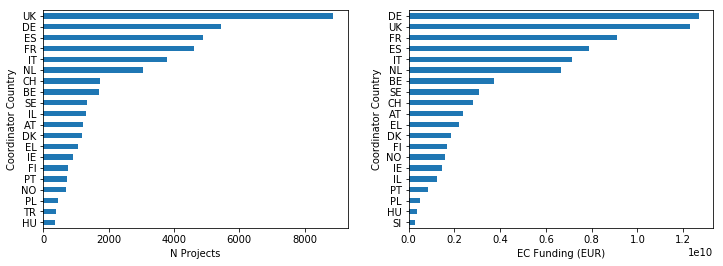

In [35]:
cordis_projects_df_by_country = cordis_projects_df.groupby('coordinatorCountry')
topn = 20

fig, ax = plt.subplots(ncols=2, figsize=(12, 4))
cordis_projects_df_by_country.count()['id'].sort_values()[-topn:].plot.barh(
    color='C0',
    ax=ax[0])
cordis_projects_df_by_country.sum()['ecMaxContribution'].sort_values()[-topn:].plot.barh(color='C0', ax=ax[1])
ax[0].set_xlabel('N Projects')
ax[0].set_ylabel('Coordinator Country')
ax[1].set_xlabel('EC Funding (EUR)')
ax[1].set_ylabel('Coordinator Country')
plt.show()

In [171]:
from itertools import combinations, repeat
from collections import defaultdict

In [191]:
country_collaborations = defaultdict(list)

for participants, coordinator in zip(cordis_projects_df['participantCountries'][~pd.isnull(cordis_projects_df['participantCountries'])],
                    cordis_projects_df['coordinatorCountry']):
    p = participants.split(';')
    for pa, co in zip(p, repeat(coordinator, len(p))):
        if co != pa:
            country_collaborations['Coordinator Country'].append(co)
            country_collaborations['Participant Country'].append(pa)
            country_collaborations['count'].extend([1])

In [128]:
# country_collaborations = defaultdict(list)

# for countries in cordis_projects_df['participantCountries'][~pd.isnull(cordis_projects_df['participantCountries'])]:
#     c = countries.split(';')
#     for pair in combinations(c, 2):
#         country_collaborations['source'].append(pair[0])
#         country_collaborations['source'].append(pair[1])
#         country_collaborations['target'].append(pair[1])
#         country_collaborations['target'].append(pair[0])
#         country_collaborations['count'].extend([1,1])

In [192]:
country_counts_df = pd.DataFrame(country_collaborations)

In [193]:
country_counts_pivot = country_counts_df.pivot_table(
    index='Coordinator Country',
    values='count',
    columns='Participant Country',
#     aggfunc=lambda x: np.log(np.sum(x)),
    aggfunc=np.sum
)

In [194]:
sort_order = cordis_projects_df['coordinatorCountry'].value_counts().index.values
sort_index = [s for s in sort_order if s in country_counts_pivot.index]
sort_cols = [s for s in sort_order if s in country_counts_pivot.columns]

In [195]:
country_counts_pivot = country_counts_pivot.reindex(
    sort_index
)[sort_cols]

In [196]:
from matplotlib.colors import LogNorm

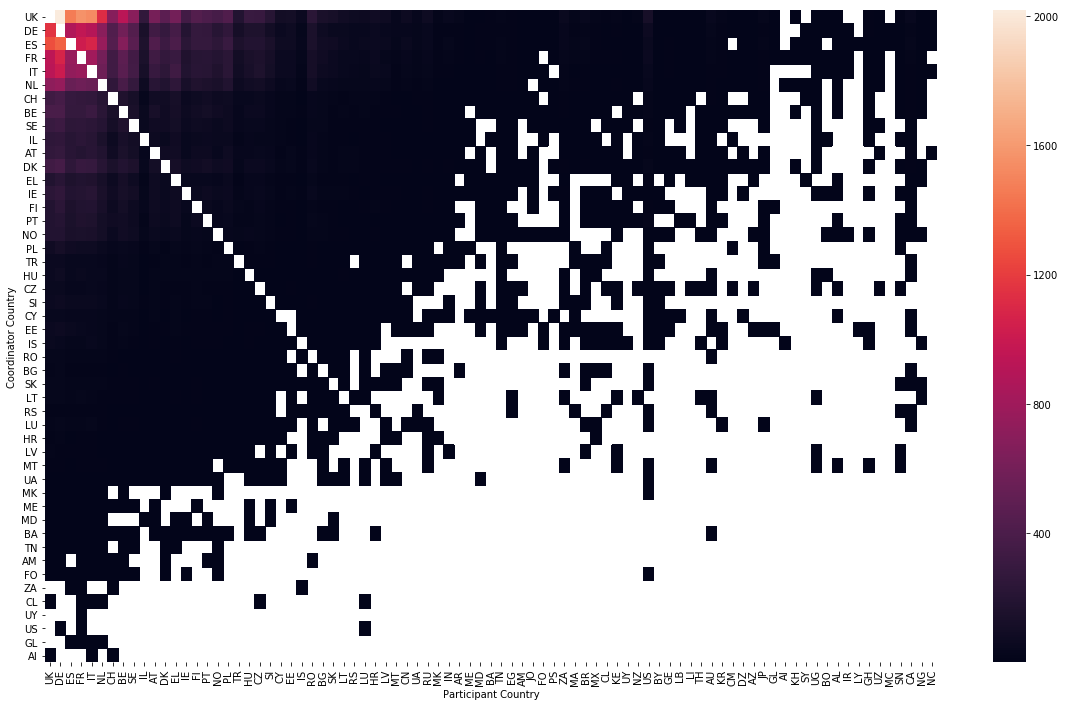

In [203]:
fig, ax = plt.subplots(figsize=(20, 12))
ax = sns.heatmap(country_counts_pivot,
#                  norm=LogNorm(vmin=country_counts_pivot.min().min(), vmax=country_counts_pivot.max().max())
                )
plt.show()

### Report

In [95]:
cordis_reports_df.head(1)

,rcn,language,title,teaser,summary,workPerformed,finalResults,lastUpdateDate,country,projectID,projectAcronym,programme,topics,relatedFile,url,article
0,242635,en,Periodic Reporting for period 1 - DIET-SEX-GEN...,"In this research programme, I sought to invest...","In this research programme, I sought to invest...","""The project started by performing a large exp...","Although the project funding has seized, the r...",2018-11-30 10:07:22,NaN,708362,DIET-SEX-GENOMICS,H2020-EU.1.3.2.,MSCA-IF-2015-EF,/docs/results/h2020/708/708362_PS/img-0884.jpg,http://www.florenciacamus.com,NaN
